Saved plot to ./comparison/mean_episode_reward.png


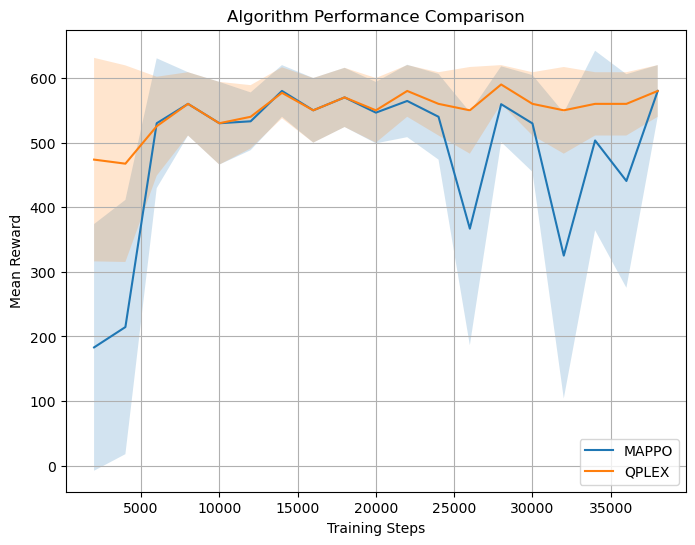

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

def load_eval_results(log_dir):
    results = []
    for fname in sorted(os.listdir(log_dir)):
        if fname.startswith("eval_results") and fname.endswith(".json"):
            try:
                step = int(fname.split("_")[2].split(".")[0])
            except (IndexError, ValueError):
                print(f"[!] Skipping invalid file name: {fname}")
                continue

            with open(os.path.join(log_dir, fname), 'r') as f:
                data = json.load(f)

            mean = data.get("mean_episode_reward", data.get("mean_reward"))
            std = data.get("std_episode_reward", data.get("std_reward"))
            if mean is None or std is None:
                print(f"[!] Missing keys in {fname}, skipping...")
                continue

            results.append((step, mean, std))

    results.sort(key=lambda x: x[0])
    return np.array(results) if len(results) > 0 else np.array([])


def plot_algorithms(log_dirs, algo_names, save_path=None):
    plt.figure(figsize=(8,6))
    for log_dir, name in zip(log_dirs, algo_names):
        results = load_eval_results(log_dir)
        if len(results) == 0:
            print(f"[!] No valid eval files found in {log_dir}")
            continue

        steps, mean_rewards, std_rewards = results[:,0], results[:,1], results[:,2]
        plt.plot(steps, mean_rewards, label=name)
        plt.fill_between(steps, mean_rewards - std_rewards, mean_rewards + std_rewards, alpha=0.2)

    plt.xlabel("Training Steps")
    plt.ylabel("Mean Reward")
    plt.title("Algorithm Performance Comparison")
    plt.legend()
    plt.grid(True)

    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Saved plot to {save_path}")
    plt.show()


if __name__ == "__main__":
    log_dirs = [
        "logs/mappo/",
        "logs/qplex/"
    ]
    algo_names = [ "MAPPO", "QPLEX"]

    plot_algorithms(log_dirs, algo_names, save_path="./comparison/mean_episode_reward.png")


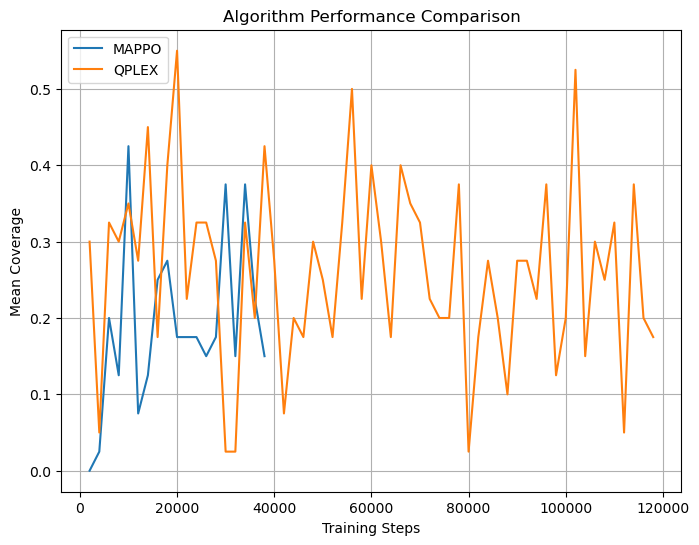

In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

def load_eval_results(log_dir):
    results = []
    for fname in sorted(os.listdir(log_dir)):
        if fname.startswith("eval_results") and fname.endswith(".json"):
            try:
                step = int(fname.split("_")[2].split(".")[0])
            except (IndexError, ValueError):
                print(f"[!] Skipping invalid file name: {fname}")
                continue

            with open(os.path.join(log_dir, fname), 'r') as f:
                data = json.load(f)

            mean_cov = data.get("mean_coverage_rate", None)

            results.append((step, mean_cov))

    results.sort(key=lambda x: x[0])
    return np.array(results) if len(results) > 0 else np.array([])


def plot_algorithms(log_dirs, algo_names, save_path=None):
    plt.figure(figsize=(8,6))
    for log_dir, name in zip(log_dirs, algo_names):
        results = load_eval_results(log_dir)
        if len(results) == 0:
            print(f"[!] No valid eval files found in {log_dir}")
            continue

        steps, mean_coverage, = results[:,0], results[:,1]
        plt.plot(steps, mean_coverage, label=name)

    plt.xlabel("Training Steps")
    plt.ylabel("Mean Coverage")
    plt.title("Algorithm Performance Comparison")
    plt.legend()
    plt.grid(True)


if __name__ == "__main__":
    log_dirs = [
        "logs/mappo/",
        "logs/qplex/"
    ]
    algo_names = [ "MAPPO", "QPLEX"]

    plot_algorithms(log_dirs, algo_names, save_path="./comparison/mean_coverage.png")
